In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [31]:
train = pd.read_csv(r'/content/train.csv') #Load train data (Write train.csv directory)
test = pd.read_csv(r'/content/test.csv') #Load test data (Write test.csv directory)

# Verify the types of train and test
print(type(train))
print(type(test))

# Concatenate train and test data
data = pd.concat([train, test], sort=False)

# Visualize the DataFrame data
data

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


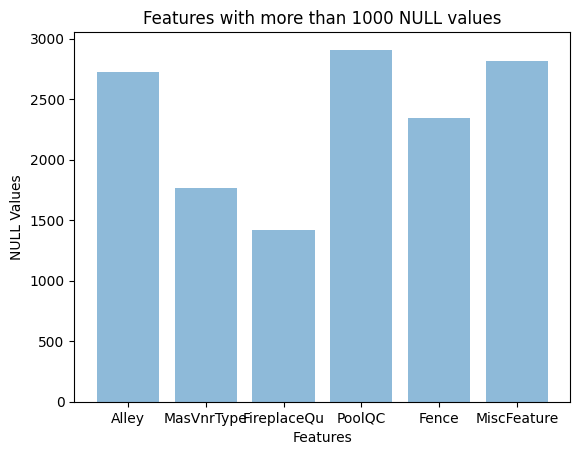

In [32]:
#Plot features with more than 1000 NULL values

features = []
nullValues = []
for i in data:
    if (data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
y_pos = np.arange(len(features))
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()

In [33]:
#Dealing with NULL values

data = data.dropna(axis=1, thresh=1000)
# Select only numerical columns
numeric_columns = data.select_dtypes(include='number')

# Replace NaN values in numerical columns with the mean
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

# Display the updated DataFrame
data

<ipython-input-33-21435b755278>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,180921.19589
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,180921.19589
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,180921.19589
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,180921.19589


In [34]:
#Dealing with NULL values

data = pd.get_dummies(data) #Convert string values to integer values

In [35]:
#Drop features that are correlated to each other

covarianceMatrix = data.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set()
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 was the one that gave the best results

data = data.drop(setOfDroppedFeatures, axis=1)

In [36]:
#Drop features that are not correlated with output

nonCorrelatedWithOutput = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.045]
#I tried different values of threshold and 0.045 was the one that gave the best results

data = data.drop(nonCorrelatedWithOutput, axis=1)

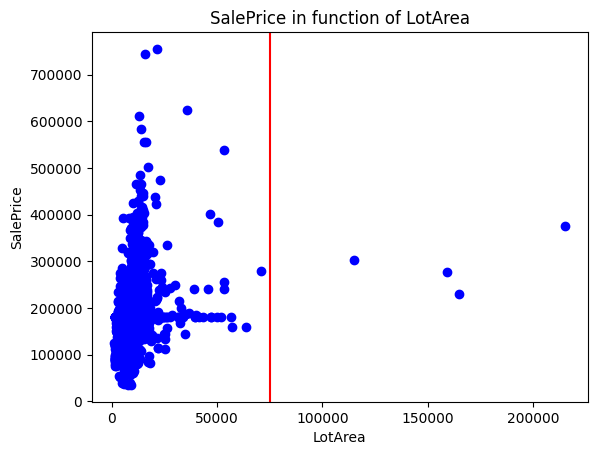

In [37]:
#Plot one of the features with outliers

plt.plot(data['LotArea'], data['SalePrice'], 'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()

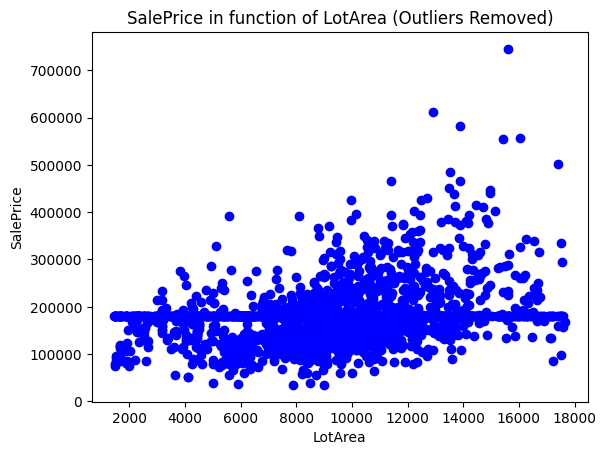

In [38]:
# Remove outliers from the 'data' DataFrame
newData = data.copy()  # Make a copy of the original DataFrame

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the 'LotArea' column
newData = remove_outliers_iqr(newData, 'LotArea')

# Plot the feature 'LotArea' against 'SalePrice' after removing outliers
plt.plot(newData['LotArea'], newData['SalePrice'], 'bo')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea (Outliers Removed)')
plt.show()

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Assuming 'trainWithoutOutliers' contains the preprocessed data without outliers

# Split the data into features (X) and target variable (Y)
X = trainWithoutOutliers.drop("SalePrice", axis=1)  # Features
Y = np.log1p(trainWithoutOutliers["SalePrice"])  # Target variable {log1p(x) = log(x+1)}

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Train Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_linear = linear_reg.predict(X_test)
Y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate models using various metrics
metrics = {
    'Linear Regression': {
        'MSE': mean_squared_error(Y_test, Y_pred_linear),
        'R^2': r2_score(Y_test, Y_pred_linear),
        'Explained Variance': explained_variance_score(Y_test, Y_pred_linear)
    },
    'Random Forest Regression': {
        'MSE': mean_squared_error(Y_test, Y_pred_rf),
        'R^2': r2_score(Y_test, Y_pred_rf),
        'Explained Variance': explained_variance_score(Y_test, Y_pred_rf)
    }
}

# Print evaluation metrics for each model
for model, scores in metrics.items():
    print(f"{model} Metrics:")
    for metric, score in scores.items():
        print(f"{metric}: {score}")
    print()

# Compare the performance of the models based on selected metrics
better_models = []
for metric in metrics['Linear Regression'].keys():
    if metrics['Linear Regression'][metric] < metrics['Random Forest Regression'][metric]:
        better_models.append('Linear Regression')
    elif metrics['Random Forest Regression'][metric] < metrics['Linear Regression'][metric]:
        better_models.append('Random Forest Regression')
    else:
        better_models.append('Both models')

print("Better models based on each metric:")
for metric, better_model in zip(metrics['Linear Regression'].keys(), better_models):
    print(f"{metric}: {better_model}")


Linear Regression Metrics:
MSE: 0.011689912091066082
R^2: 0.9182698323804653
Explained Variance: 0.9182700015072023

Random Forest Regression Metrics:
MSE: 0.02006682047860176
R^2: 0.8597025718815594
Explained Variance: 0.8597864723287206

Better models based on each metric:
MSE: Linear Regression
R^2: Random Forest Regression
Explained Variance: Random Forest Regression


In [45]:
X = trainWithoutOutliers.drop("SalePrice", axis=1) #Remove SalePrice column
Y = np.log1p(trainWithoutOutliers["SalePrice"]) #Get SalePrice column {log1p(x) = log(x+1)}
reg = LinearRegression().fit(X, Y)

In [46]:
# Make prediction

# Check if 'SalePrice' exists in 'newTest' before attempting to drop it
if 'SalePrice' in newTest.columns:
    newTest = newTest.drop("SalePrice", axis=1)  # Remove 'SalePrice' column

# Predict the SalePrice using the regression model
pred = np.expm1(reg.predict(newTest))

# Submit prediction

sub = pd.DataFrame()  # Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = pred


# Visualize the DataFrame sub
sub

,Id,SalePrice
0,1461,127151.213964
1,1462,157506.134729
2,1463,179665.959950
3,1464,201064.594795
4,1465,202333.685273
...,...,...
1454,2915,79049.827759
1455,2916,76615.348909
1456,2917,181285.593856
1457,2918,119216.180374
